In [1]:
from sklearn.cluster import KMeans
import os
os.chdir('..')
from src.util import *
from src.recommender import MovieRecommender
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
os.getcwd()

'/Users/kylecaron/Desktop/movie_recommender'

In [3]:
users = pd.read_csv('data/users.dat', sep='::', header=None)
users.columns = ['UserID','Gender','Age','Occupation','Zip']
#clean
users.Zip = users.Zip.str.slice(0,5)
#users.Zip = users.Zip.str.slice(0,1)
users.Gender = users.Gender.map({'F':0, 'M':1})
users.Zip = users.Zip.astype('int64')

/Users/kylecaron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


# Scatter Plot 3D

In [4]:
estimators = [('8 clusters', KMeans(n_clusters=8)),
              ('6 clusters', KMeans(n_clusters=6)),
              ('5 clusters', KMeans(n_clusters=5)),
              ('4 clusters', KMeans(n_clusters=4)),
              ('3 clusters', KMeans(n_clusters=3)),
              ('2 clusters', KMeans(n_clusters=2))]

X = users.values
X = X[:,1:]

# Scale X Data

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

/Users/kylecaron/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kylecaron/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/Users/kylecaron/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


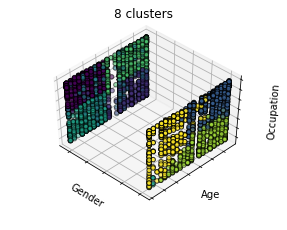

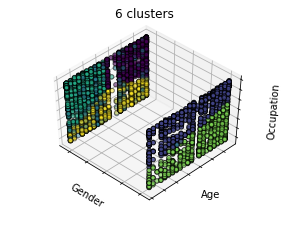

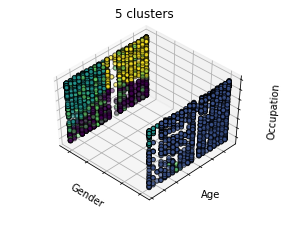

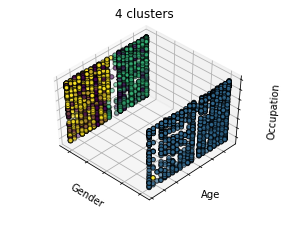

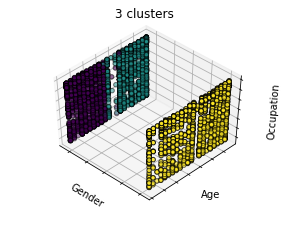

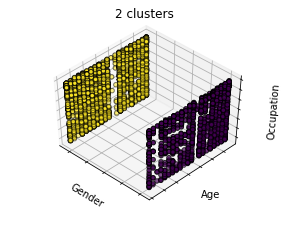

In [6]:
fignum = 1
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 2], X[:, 3],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Gender')
    ax.set_ylabel('Age')
    ax.set_zlabel('Occupation')
    ax.set_title(name)
    ax.dist = 12
    fignum = fignum + 1

fig.show()

# Evaluate Num K

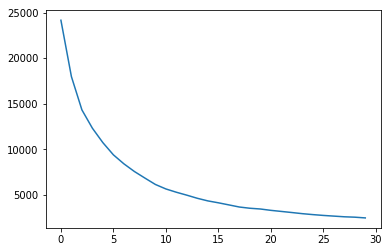

In [7]:
number_k = []
for i in range(30):
    est = KMeans(i+1).fit(X)
    sse = -1*est.score(X)
    number_k.append(sse)
plt.plot(number_k)

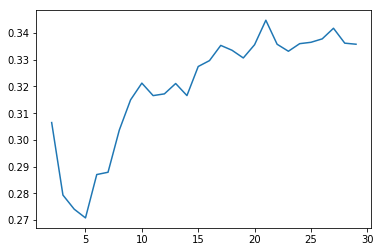

In [8]:
sil= []
for i in range(2,30):
    est = KMeans(i).fit(X)
    labels = est.predict(X)
    sil_score = silhouette_score(X, labels)
    sil.append([i,sil_score])
sil = np.array(sil)
plt.plot(sil[:,0], sil[:,1])

As you can see form the silhouette score plot, 5 is the ideal number of clusters

# KMeans with K = 5 to predict groups

In [9]:
kmeans = KMeans(5).fit(X)
labels = kmeans.labels_

In [10]:
user_groups = pd.DataFrame(labels,users.UserID.unique()).reset_index()
user_groups.columns = ['user', 'cluster']

In [11]:
user_groups.to_csv('data/clustered_users.csv')

In [12]:
user_groups.head()

,user,cluster
0,1,3
1,2,0
2,3,1
3,4,0
4,5,1
